In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

pd.set_option('display.max_columns', 700)
pd.set_option('display.max_rows', 400)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_colwidth', 10)

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

pd.set_option('display.max_columns', 700)
pd.set_option('display.max_rows', 400)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_colwidth', 50)

In [6]:
df = pd.read_csv('facebook_ads_data_dz4.5.csv')
df

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [7]:
day_gr_spend = df.groupby('ad_date')['total_spend'].sum()
day_gr_spend

ad_date
2020-11-11      1.89
2020-11-12     23.00
2020-11-13      6.36
2020-11-14      7.27
2020-11-15      6.98
               ...  
2022-10-29    714.03
2022-10-30    335.91
2022-10-31    227.45
2022-11-01      0.00
2022-11-05      0.00
Name: total_spend, Length: 547, dtype: float64

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '2022-04-10'),
  Text(0.0, 0, '2020-11-11'),
  Text(100.0, 0, '2021-02-24'),
  Text(200.0, 0, '2021-07-08'),
  Text(300.0, 0, '2021-10-16'),
  Text(400.0, 0, '2022-01-28'),
  Text(500.0, 0, '2022-06-02'),
  Text(600.0, 0, '')])

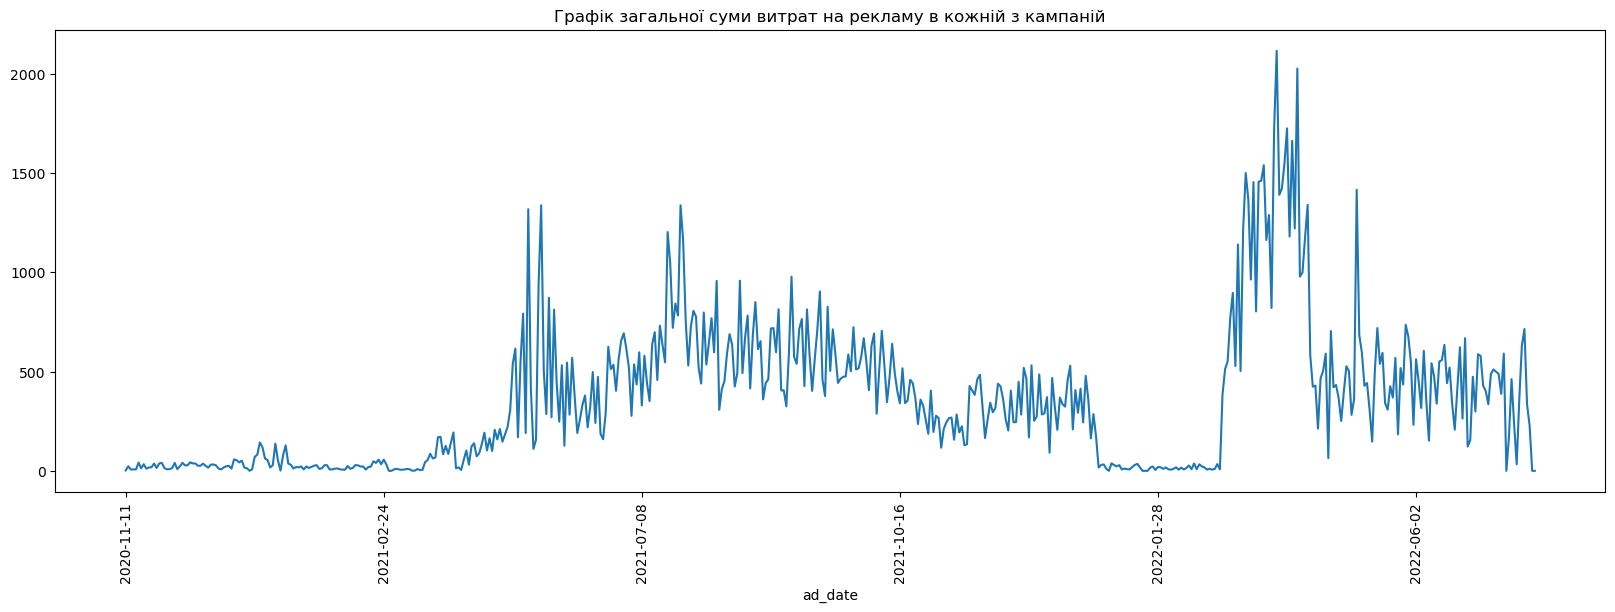

In [19]:
day_gr_spend.plot(kind = 'line', figsize=(20,6))
plt.title('Графік загальної суми витрат на рекламу в кожній з кампаній')
plt.xticks(rotation = 'vertical')

In [9]:
day_gr_romi = df.groupby('ad_date')['romi'].mean()
day_gr_romi
# (df['date'].dt.year)

ad_date
2020-11-11    1.259259
2020-11-12    0.918696
2020-11-13    1.536164
2020-11-14    1.742779
2020-11-15    1.570201
                ...   
2022-10-29    0.952817
2022-10-30    1.406954
2022-10-31    0.843570
2022-11-01         NaN
2022-11-05         NaN
Name: romi, Length: 547, dtype: float64

Text(0.5, 1.0, 'Загальний ROMI в кожній з кампаній')

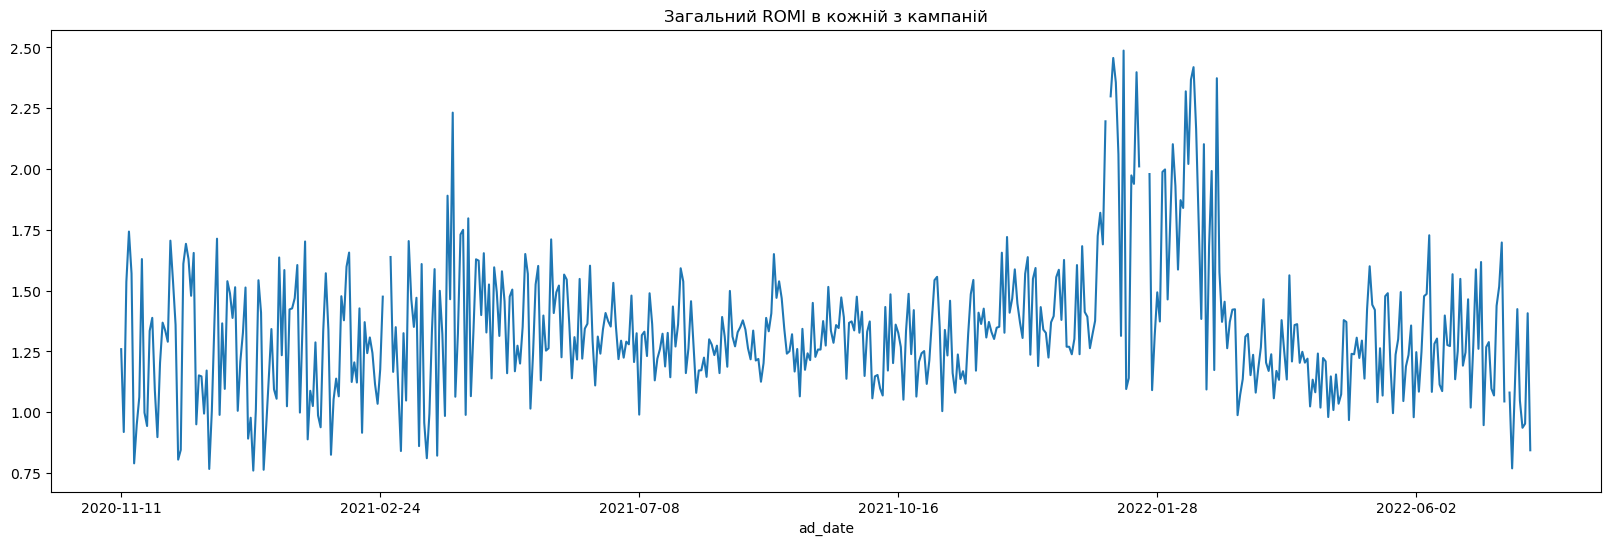

In [10]:
fig = plt.figure(figsize=(20,6))
day_gr_romi.plot(kind = 'line')
plt.title('Загальний ROMI в кожній з кампаній')
# plt.xticks(day_gr_romi['ad_date'][::2])

In [11]:
display (df['ad_date'][::2], df['ad_date'])

0       2022-11-05
2       2022-10-31
4       2022-10-29
6       2022-10-27
8       2022-07-10
           ...    
1484    2020-11-20
1486    2020-11-18
1488    2020-11-16
1490    2020-11-14
1492    2020-11-12
Name: ad_date, Length: 747, dtype: object

0       2022-11-05
1       2022-11-01
2       2022-10-31
3       2022-10-30
4       2022-10-29
           ...    
1489    2020-11-15
1490    2020-11-14
1491    2020-11-13
1492    2020-11-12
1493    2020-11-11
Name: ad_date, Length: 1494, dtype: object

In [12]:
day_gr_name = df.groupby('campaign_name').agg({'total_spend': 'sum', 'romi': 'mean'})
day_gr_name

,total_spend,romi
campaign_name,,
Brand,539.92,1.241293
Crazy discounts,2175.29,1.208851
Discounts,2856.39,1.247111
Electronics,23920.42,1.225274
Expansion,67212.82,1.237941
Hobbies,11326.97,1.238967
Lookalike,63631.09,1.245056
New items,2936.97,1.279135
Promos,4993.84,1.751932


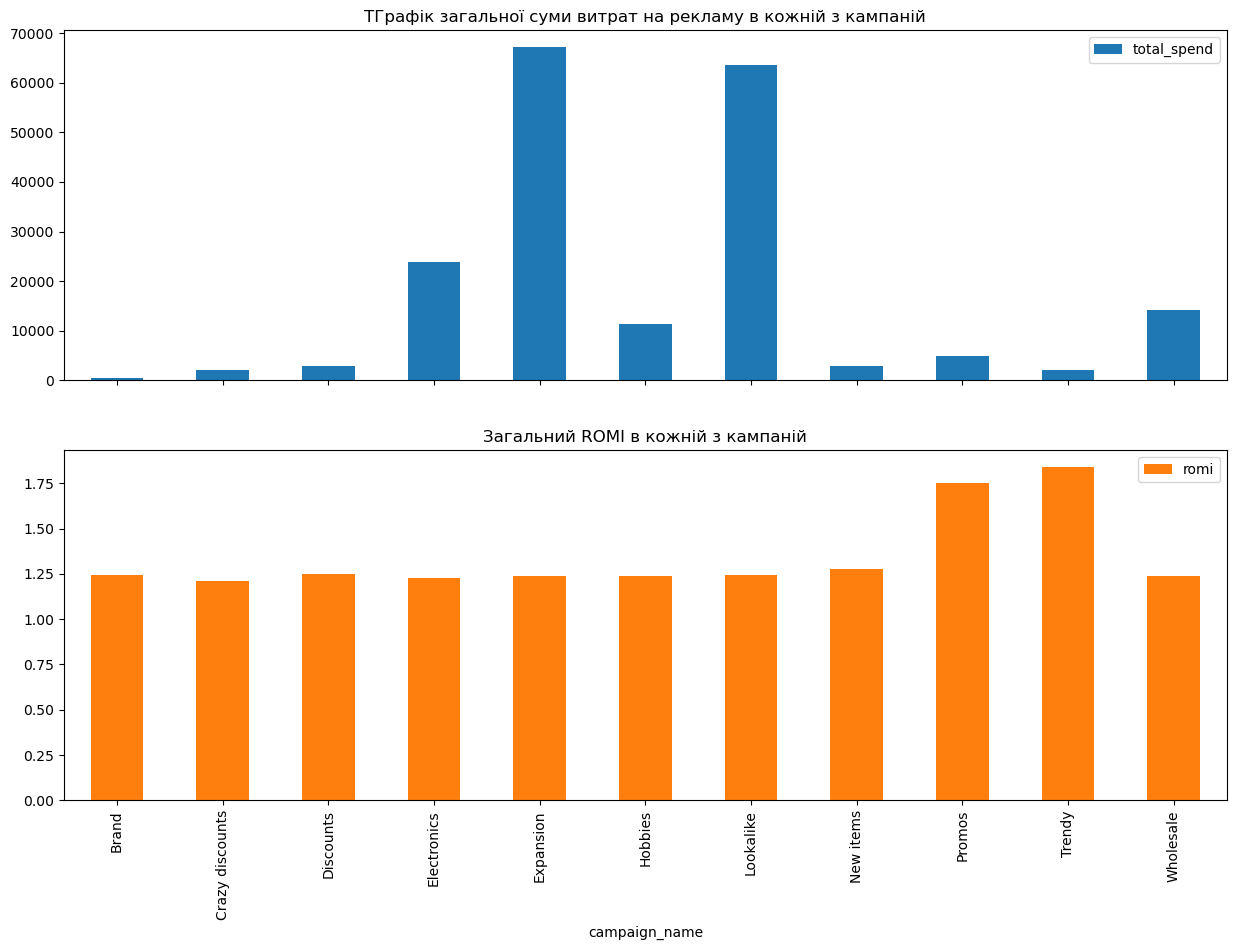

In [13]:

ttl = day_gr_name.plot(kind='bar', subplots=True, layout=(2,1), figsize=(15, 10))

# Adding titles to subplots
ttl[0, 0].set_title('TГрафік загальної суми витрат на рекламу в кожній з кампаній')
ttl[1, 0].set_title('Загальний ROMI в кожній з кампаній')

plt.show()


Text(0.5, 1.0, 'Розкид щоденного ROMI в кожній кампаній (за назвою кампанії.')

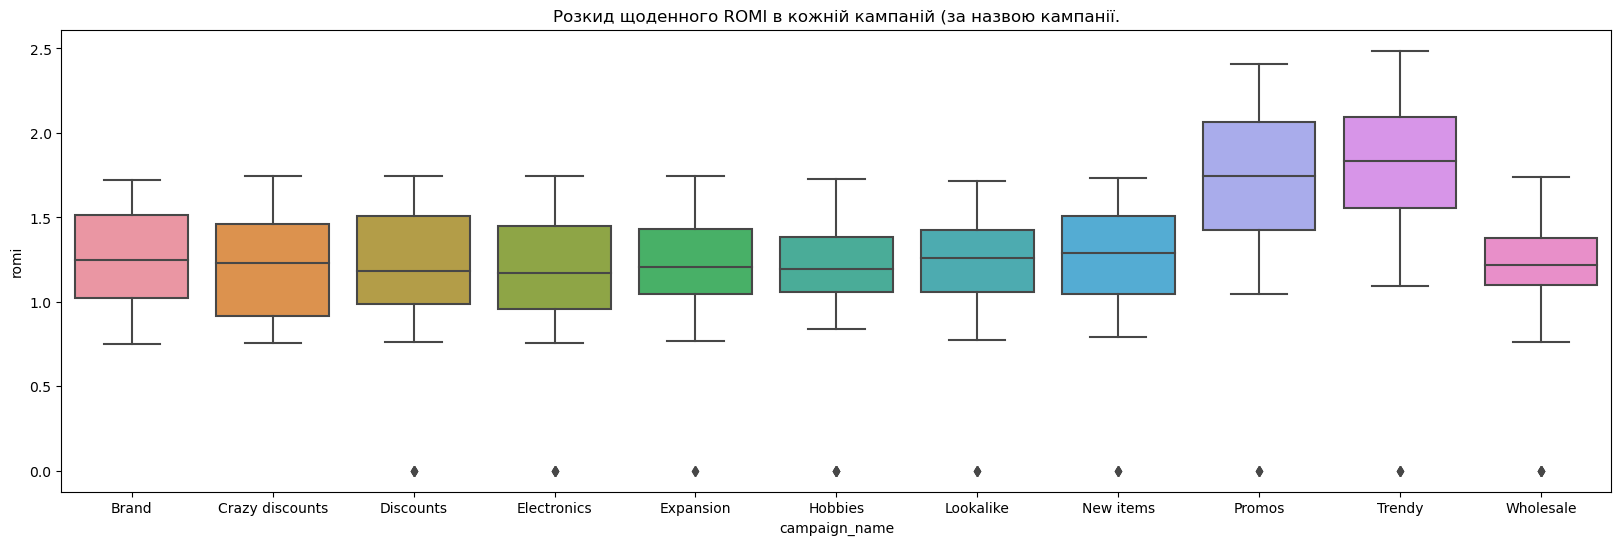

In [14]:
fig = plt.figure(figsize=(20,6))
box = df.groupby(['campaign_name', 'ad_date'])['romi'].sum().reset_index()
sns.boxplot(x ='campaign_name', y ='romi', data=box)
plt.title('Розкид щоденного ROMI в кожній кампаній (за назвою кампанії.')


Text(0, 0.5, 'Розподіл')

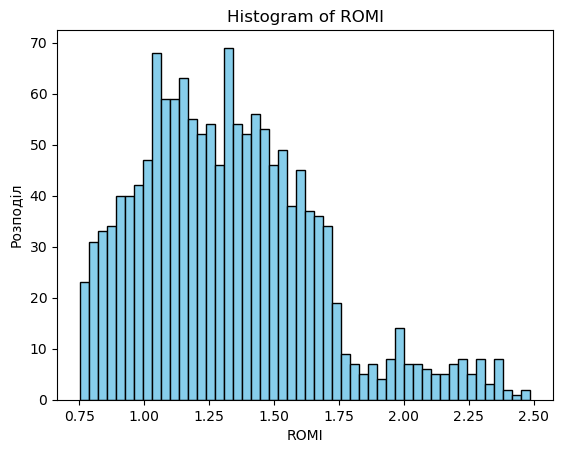

In [15]:
plt.hist(df['romi'], bins=50, color='skyblue', edgecolor='black')


plt.title('Histogram of ROMI')
plt.xlabel('ROMI')
plt.ylabel('Розподіл')

Text(0.5, 1.0, 'Теплова карта')

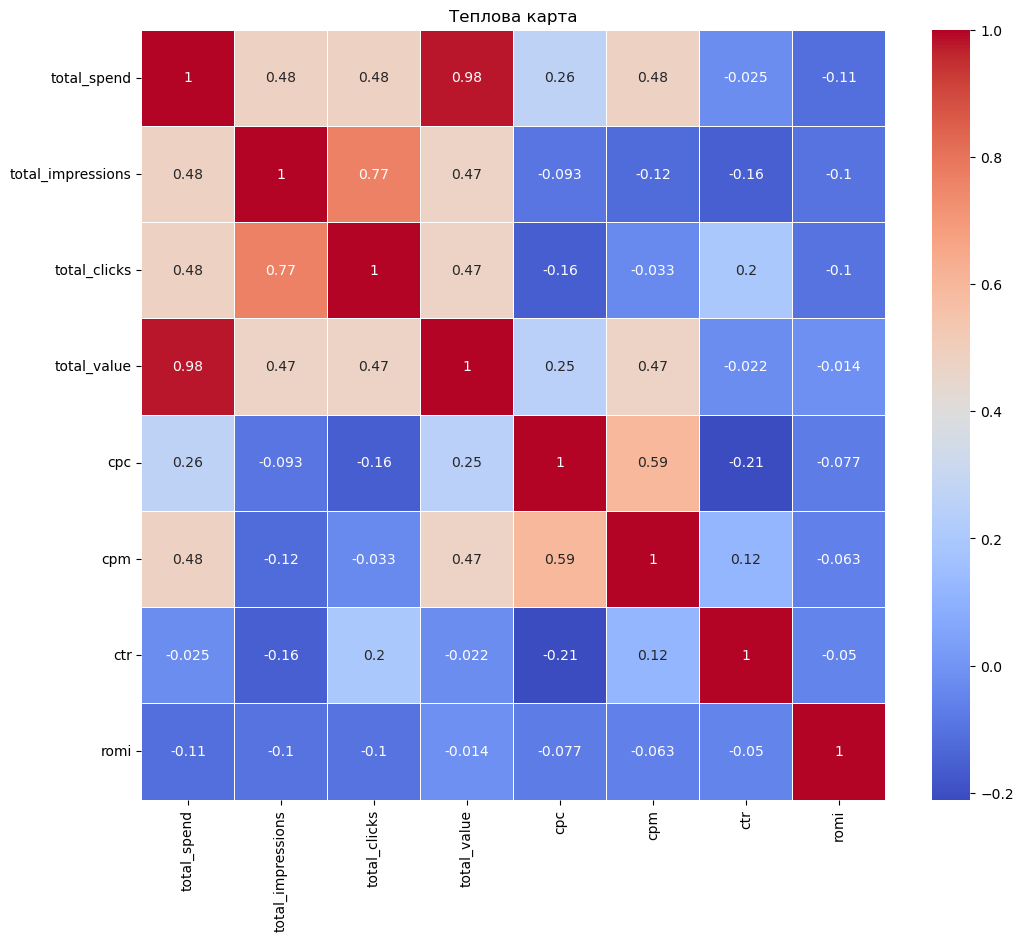

In [16]:
c_map = df.corr()


plt.figure(figsize=(12, 10))


sns.heatmap(c_map, annot=True, cmap='coolwarm', linewidths=.5)


plt.title('Теплова карта')


# Total value корелює з total spend

# Які показники мають найвищу та найнижчу кореляцію?

# Хто ж його знає

Text(0.5, 1.0, 'Точкова діаграма з лінійною регресією')

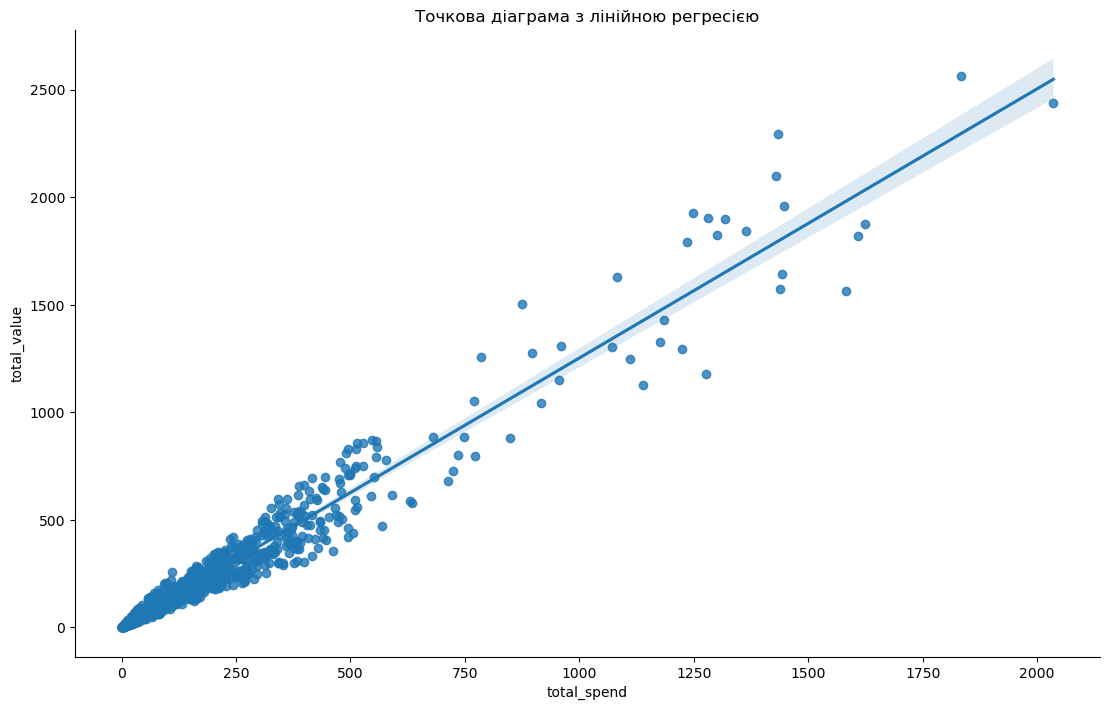

In [17]:
sns.lmplot(x='total_spend', y='total_value', data=df, height=7, aspect=1.6)
plt.title('Точкова діаграма з лінійною регресією')